In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving ALLIANCE FINANCE COMPANY PLC.csv to ALLIANCE FINANCE COMPANY PLC.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['ALLIANCE FINANCE COMPANY PLC.csv']))
df

,Trade_Date,Open,High,Low,Close,Change,Lable,Tweets,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis
0,6/28/22,50.5,52.1,50.5,51.00,0.50,1,LIOC top 100 SH comparison 30/05 to 20/06 ...,0.000,0.795,0.205,0.2023,0.500000,0.500000,Positive
1,6/27/22,53.6,53.6,51.2,53.80,0.20,1,"If you have a little bit of commercial sense, ...",0.194,0.806,0.000,-0.8555,0.363333,-0.107500,Negative
2,6/27/22,53.6,53.6,51.2,53.80,0.20,1,_UNP will have a separate hell to go for rescu...,0.304,0.696,0.000,-0.8625,0.800000,-0.800000,Negative
3,6/22/22,51.0,51.0,50.0,50.50,-0.50,0,Entire Sri Lanka is grateful to team Australi...,0.000,0.647,0.353,0.9729,0.491667,0.166667,Positive
4,6/22/22,51.0,51.0,50.0,50.50,-0.50,0,CSE https//t.co/OREuFsx5Kl,0.000,1.000,0.000,0.0000,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,12/28/21,105.0,105.0,96.5,100.00,-5.00,0,Yeah. Very strong price action. SHL is the ul...,0.000,0.651,0.349,0.8955,0.475565,0.195119,Positive
165,12/27/21,95.0,112.0,95.0,103.75,8.75,1,_Media Market capitalization,0.000,1.000,0.000,0.0000,0.000000,0.000000,Neutral
166,12/27/21,95.0,112.0,95.0,103.75,8.75,1,Thought to eliminate any value consideration...,0.000,0.670,0.330,0.9226,0.585714,0.000000,Neutral
167,12/24/21,91.0,92.6,89.0,90.30,-0.70,0,? I rarely buy a stock that has corrected 60% ...,0.000,1.000,0.000,0.0000,0.633333,0.433333,Positive


In [ ]:
df2=df
df.drop("Sentiment_Analysis",axis=1,inplace=True)
df2

,Trade_Date,Open,High,Low,Close,Change,Lable,Tweets,Negative,Neutral,Positive,Compound,Subjectivity,Polarity
0,6/28/22,50.5,52.1,50.5,51.00,0.50,1,LIOC top 100 SH comparison 30/05 to 20/06 ...,0.000,0.795,0.205,0.2023,0.500000,0.500000
1,6/27/22,53.6,53.6,51.2,53.80,0.20,1,"If you have a little bit of commercial sense, ...",0.194,0.806,0.000,-0.8555,0.363333,-0.107500
2,6/27/22,53.6,53.6,51.2,53.80,0.20,1,_UNP will have a separate hell to go for rescu...,0.304,0.696,0.000,-0.8625,0.800000,-0.800000
3,6/22/22,51.0,51.0,50.0,50.50,-0.50,0,Entire Sri Lanka is grateful to team Australi...,0.000,0.647,0.353,0.9729,0.491667,0.166667
4,6/22/22,51.0,51.0,50.0,50.50,-0.50,0,CSE https//t.co/OREuFsx5Kl,0.000,1.000,0.000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,12/28/21,105.0,105.0,96.5,100.00,-5.00,0,Yeah. Very strong price action. SHL is the ul...,0.000,0.651,0.349,0.8955,0.475565,0.195119
165,12/27/21,95.0,112.0,95.0,103.75,8.75,1,_Media Market capitalization,0.000,1.000,0.000,0.0000,0.000000,0.000000
166,12/27/21,95.0,112.0,95.0,103.75,8.75,1,Thought to eliminate any value consideration...,0.000,0.670,0.330,0.9226,0.585714,0.000000
167,12/24/21,91.0,92.6,89.0,90.30,-0.70,0,? I rarely buy a stock that has corrected 60% ...,0.000,1.000,0.000,0.0000,0.633333,0.433333


In [ ]:
df2.drop("Tweets",axis=1,inplace=True)
df2

,Trade_Date,Open,High,Low,Close,Change,Lable,Negative,Neutral,Positive,Compound,Subjectivity,Polarity
0,6/28/22,50.5,52.1,50.5,51.00,0.50,1,0.000,0.795,0.205,0.2023,0.500000,0.500000
1,6/27/22,53.6,53.6,51.2,53.80,0.20,1,0.194,0.806,0.000,-0.8555,0.363333,-0.107500
2,6/27/22,53.6,53.6,51.2,53.80,0.20,1,0.304,0.696,0.000,-0.8625,0.800000,-0.800000
3,6/22/22,51.0,51.0,50.0,50.50,-0.50,0,0.000,0.647,0.353,0.9729,0.491667,0.166667
4,6/22/22,51.0,51.0,50.0,50.50,-0.50,0,0.000,1.000,0.000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,12/28/21,105.0,105.0,96.5,100.00,-5.00,0,0.000,0.651,0.349,0.8955,0.475565,0.195119
165,12/27/21,95.0,112.0,95.0,103.75,8.75,1,0.000,1.000,0.000,0.0000,0.000000,0.000000
166,12/27/21,95.0,112.0,95.0,103.75,8.75,1,0.000,0.670,0.330,0.9226,0.585714,0.000000
167,12/24/21,91.0,92.6,89.0,90.30,-0.70,0,0.000,1.000,0.000,0.0000,0.633333,0.433333


In [ ]:
df2.drop("Trade_Date",axis=1,inplace=True)
df2

,Open,High,Low,Close,Change,Lable,Negative,Neutral,Positive,Compound,Subjectivity,Polarity
0,50.5,52.1,50.5,51.00,0.50,1,0.000,0.795,0.205,0.2023,0.500000,0.500000
1,53.6,53.6,51.2,53.80,0.20,1,0.194,0.806,0.000,-0.8555,0.363333,-0.107500
2,53.6,53.6,51.2,53.80,0.20,1,0.304,0.696,0.000,-0.8625,0.800000,-0.800000
3,51.0,51.0,50.0,50.50,-0.50,0,0.000,0.647,0.353,0.9729,0.491667,0.166667
4,51.0,51.0,50.0,50.50,-0.50,0,0.000,1.000,0.000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
164,105.0,105.0,96.5,100.00,-5.00,0,0.000,0.651,0.349,0.8955,0.475565,0.195119
165,95.0,112.0,95.0,103.75,8.75,1,0.000,1.000,0.000,0.0000,0.000000,0.000000
166,95.0,112.0,95.0,103.75,8.75,1,0.000,0.670,0.330,0.9226,0.585714,0.000000
167,91.0,92.6,89.0,90.30,-0.70,0,0.000,1.000,0.000,0.0000,0.633333,0.433333


**Discriminant Analysis**

In [ ]:
X=df2
X=np.array(X.drop(["Lable"],1))
y=np.array(df2["Lable"])
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<ipython-input-7-f27bc95ff637>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(X.drop(["Lable"],1))


In [ ]:
model=LinearDiscriminantAnalysis().fit(x_train,y_train)
model

LinearDiscriminantAnalysis()

In [ ]:
predictions=model.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       0.69      1.00      0.81        11

    accuracy                           0.85        34
   macro avg       0.84      0.89      0.85        34
weighted avg       0.90      0.85      0.86        34



In [ ]:
print(confusion_matrix(y_test,predictions))

[[18  5]
 [ 0 11]]


In [ ]:
print(accuracy_score(y_test,predictions))

0.8529411764705882


In [ ]:
model.intercept_

array([-571.34900844])

In [ ]:
model.score(x_train,y_train)*100

94.07407407407408

In [ ]:
mse=mean_squared_error(predictions,y_test)
mse

0.14705882352941177

In [ ]:
rms=np.sqrt(mse)
rms

0.3834824944236852

**Random Forest**

In [ ]:
X=df2
X=np.array(X.drop(["Lable"],1))
y=np.array(df2["Lable"])
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<ipython-input-18-f27bc95ff637>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(X.drop(["Lable"],1))


In [ ]:
model=RandomForestClassifier().fit(x_train,y_train)
model

RandomForestClassifier()

In [ ]:
predictions=model.predict(x_test)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.92      1.00      0.96        11

    accuracy                           0.97        34
   macro avg       0.96      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



In [ ]:
print(confusion_matrix(y_test,predictions))

[[22  1]
 [ 0 11]]


In [ ]:
print(accuracy_score(y_test,predictions))

0.9705882352941176


In [ ]:
model.score(x_train,y_train)*100

100.0

In [ ]:
mse=mean_squared_error(predictions,y_test)
mse

0.029411764705882353

In [ ]:
rms=np.sqrt(mse)
rms

0.17149858514250885

**Linear Regression**

In [ ]:
X=df2
X=np.array(X.drop(["Lable"],1))
y=np.array(df2["Lable"])
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<ipython-input-28-f27bc95ff637>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(X.drop(["Lable"],1))


In [ ]:
model=LinearRegression().fit(x_train,y_train)
model

LinearRegression()

In [ ]:
predictions=model.predict(x_test)
predictions

array([ 0.76309825,  0.57323838, -0.06458935,  0.12453266,  0.02715608,
        0.28305048,  0.66211821,  0.61001661,  0.50498915, -0.09684327,
        0.96290877,  0.07656608, -0.35493926,  0.05657339, -0.5431214 ,
        0.45628123, -0.21109015,  0.15805048,  0.25721302, -0.17473315,
        0.49685241,  0.64923543, -0.13522009,  0.54956828,  0.60043329,
       -0.45236712,  0.5427048 ,  0.59096534,  1.66319221,  0.73411643,
        0.61329009,  0.74536192, -0.01773077,  0.49569158])

In [ ]:
model.score(x_train,y_train)*100

51.02162154340297

In [ ]:
model.intercept_

-65.83999639986897

In [ ]:
mse=mean_squared_error(predictions,y_test)
mse

0.14782943472764468

In [ ]:
rms=np.sqrt(mse)
rms

0.3844859356694919

**Plots**

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving ALLIANCE FINANCE COMPANY PLC.csv to ALLIANCE FINANCE COMPANY PLC.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['ALLIANCE FINANCE COMPANY PLC.csv']))
df

,Trade_Date,Open,High,Low,Close,Change,Lable,Tweets,Negative,Neutral,Positive,Compound,Subjectivity,Polarity,Sentiment_Analysis
0,6/28/22,50.5,52.1,50.5,51.00,0.50,1,LIOC top 100 SH comparison 30/05 to 20/06 ...,0.000,0.795,0.205,0.2023,0.500000,0.500000,Positive
1,6/27/22,53.6,53.6,51.2,53.80,0.20,1,"If you have a little bit of commercial sense, ...",0.194,0.806,0.000,-0.8555,0.363333,-0.107500,Negative
2,6/27/22,53.6,53.6,51.2,53.80,0.20,1,_UNP will have a separate hell to go for rescu...,0.304,0.696,0.000,-0.8625,0.800000,-0.800000,Negative
3,6/22/22,51.0,51.0,50.0,50.50,-0.50,0,Entire Sri Lanka is grateful to team Australi...,0.000,0.647,0.353,0.9729,0.491667,0.166667,Positive
4,6/22/22,51.0,51.0,50.0,50.50,-0.50,0,CSE https//t.co/OREuFsx5Kl,0.000,1.000,0.000,0.0000,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,12/28/21,105.0,105.0,96.5,100.00,-5.00,0,Yeah. Very strong price action. SHL is the ul...,0.000,0.651,0.349,0.8955,0.475565,0.195119,Positive
165,12/27/21,95.0,112.0,95.0,103.75,8.75,1,_Media Market capitalization,0.000,1.000,0.000,0.0000,0.000000,0.000000,Neutral
166,12/27/21,95.0,112.0,95.0,103.75,8.75,1,Thought to eliminate any value consideration...,0.000,0.670,0.330,0.9226,0.585714,0.000000,Neutral
167,12/24/21,91.0,92.6,89.0,90.30,-0.70,0,? I rarely buy a stock that has corrected 60% ...,0.000,1.000,0.000,0.0000,0.633333,0.433333,Positive


In [ ]:
df.Polarity

0      0.500000
1     -0.107500
2     -0.800000
3      0.166667
4      0.000000
         ...   
164    0.195119
165    0.000000
166    0.000000
167    0.433333
168    0.400000
Name: Polarity, Length: 169, dtype: float64

Text(0.5, 0, 'Date')

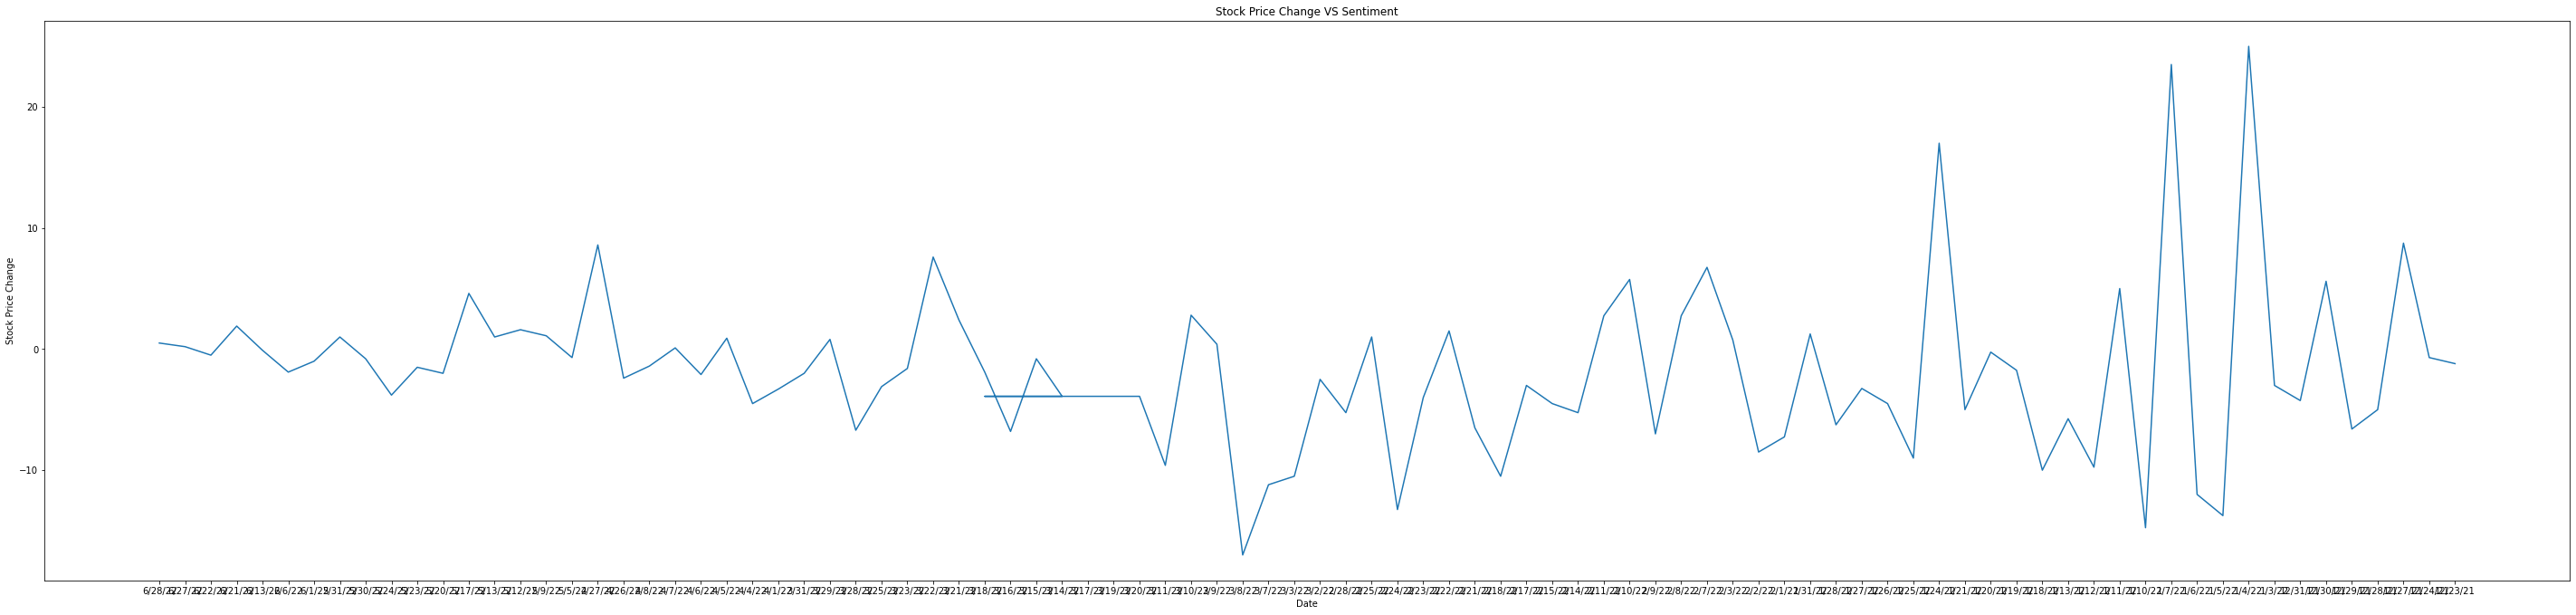

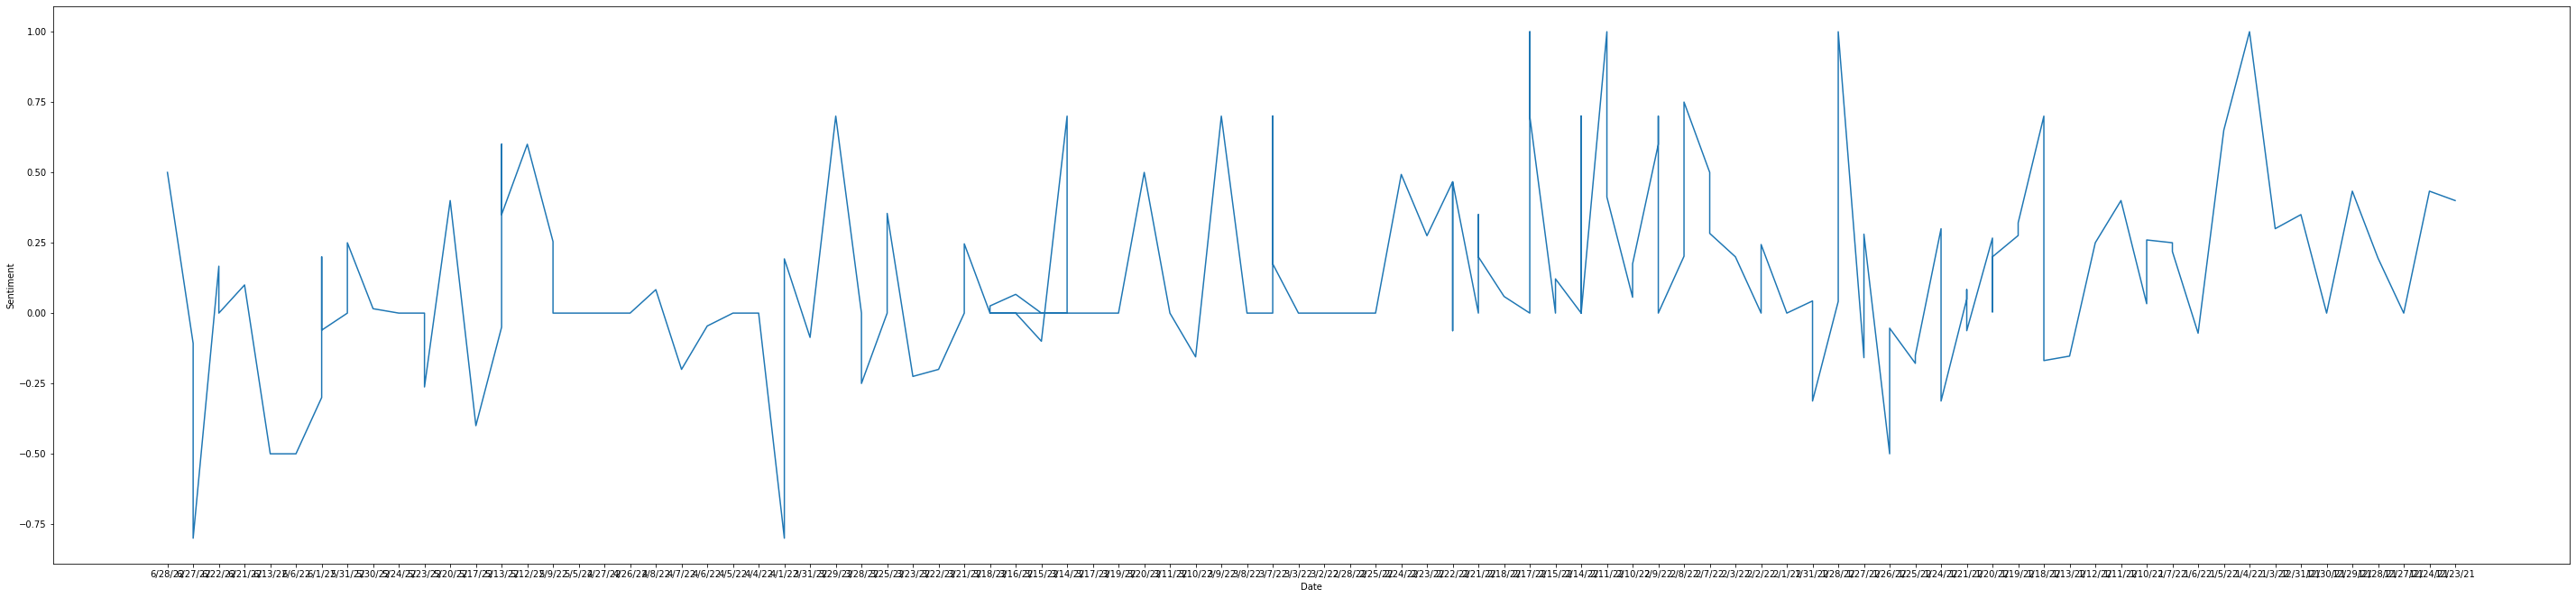

In [ ]:
plt.figure(figsize=(50,25))
x= df.Trade_Date
y1= df.Change
y2= df.Polarity


plt.subplot(2,1,1)
plt.plot(x,y1)
plt.title("Stock Price Change VS Sentiment")
plt.ylabel("Stock Price Change")
plt.xlabel("Date")

plt.figure(figsize=(50,25))
plt.subplot(2,1,2)
plt.plot(x,y2)
plt.ylabel("Sentiment")
plt.xlabel("Date")

Text(0.5, 0, 'Tweets Sentiment Polarity')

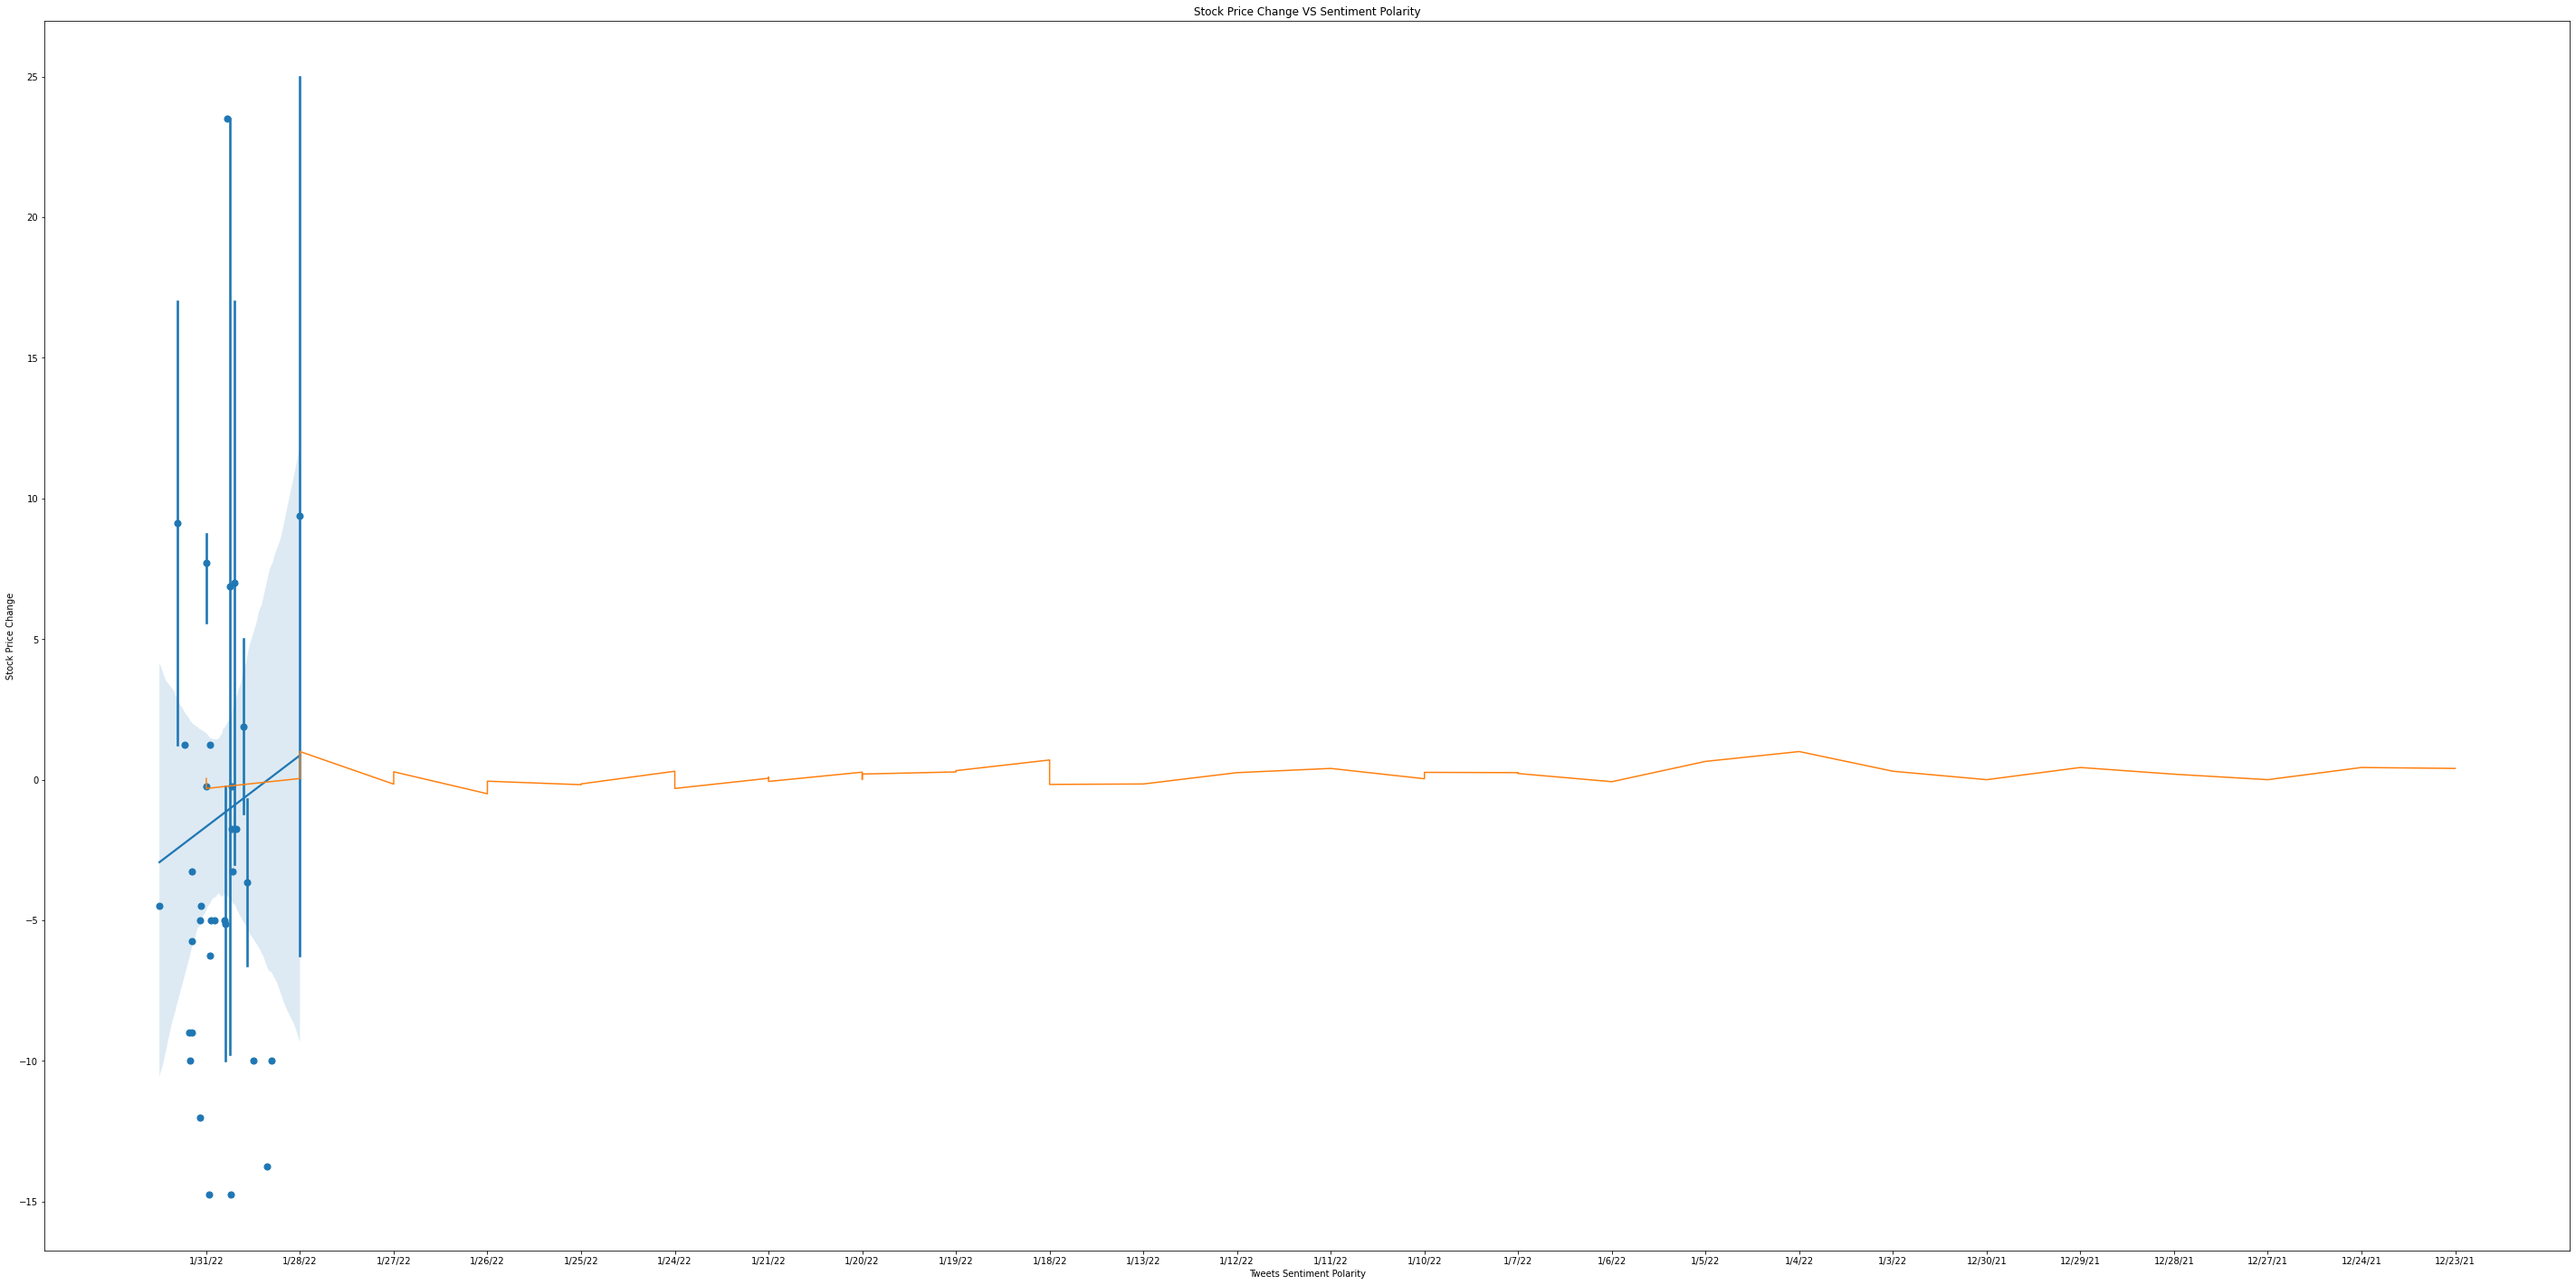

In [ ]:
plt.figure(figsize=(50,25))
ax=sns.regplot(x="Polarity",y="Change",data=df,x_estimator=np.mean)
plt.plot(x,y2)
plt.title("Stock Price Change VS Sentiment Polarity")
plt.ylabel("Stock Price Change")
plt.xlabel("Tweets Sentiment Polarity")